In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
# #PATH
filename = "songs_info.csv"

# path_to_fitur = "C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/"
# path_to_experiment ="C:/Users/USER/Downloads/Tugas Akhir/dataset/experiment/"
# path_info = "C:/Users/USER/Downloads/Tugas Akhir/dataset/annotations/"

path_info = "F:/178/Tugas Akhir/dataset/annotations/"
path_to_fitur = "F:/178/Tugas Akhir/dataset/coba fitur/"
path_to_experiment ="F:/178/Tugas Akhir/dataset/experiment/"

In [3]:
info = pd.read_csv(path_info + filename)
song_file = info['song_id'].to_list()

In [4]:
def merge(case1,case2):
    case_a = pd.DataFrame(case1)
    case_b = pd.DataFrame(case2)
    
    merged = case_a.merge(case_b, how='outer', left_index=True, right_index=True)
    
    return merged

def flat(song,fitur):
    vector = list()
    for index,i in enumerate(song):
        data = pd.read_csv(path_to_fitur+str(i)+"/"+fitur+".csv",header=None)
        vector.append(np.squeeze(data.values,0))
#     np.array(list(map(lambda x:np.squeeze(data.values,0),result)))

    return vector

def prints(result):
    print(np.shape(result))
    
def case1(file):
    fitur = 'mfcc'
    case = 'case1'
    result = flat(file,fitur)
    
    return result,case

def case2(file):
    case_1,dump = case1(file)
    fitur = 'timbre'
    case = 'case2'
    case_2 = flat(file,fitur)
    result = merge(case_1,case_2)
    
    return result,case

def case3(file):
    case_2,dump = case2(file)
    fitur1 = 'crest'
    fitur2 = 'flatness'
    case = 'case3'
    crest = flat(file,fitur1)
    flatness = flat(file,fitur2)
    results = merge(case_2,crest)
    result = merge(results,flatness)
    
    return result,case

def case4(file):
    case_3,dump = case3(file)
    fitur = 'chroma'
    case = 'case4'
    chroma = flat(file,fitur)
    result = merge(case_3,chroma)
    
    return result,case

def norm(data):
    scaler.fit(data)
    normalized = scaler.transform(data)
    
    return normalized

In [5]:
result,case = case1(song_file)
# result,case = case2(song_file)
# result,case = case3(song_file)
# result,case = case4(song_file)

prints(result)

(744, 26)


(array([  1.,   0.,   0.,   0.,   6.,  14.,   3.,   1.,   0.,   1.]),
 array([-105.26841569,  -83.31382819,  -61.35924068,  -39.40465318,
         -17.45006567,    4.50452184,   26.45910934,   48.41369685,
          70.36828436,   92.32287186,  114.27745937]),
 <a list of 10 Patch objects>)

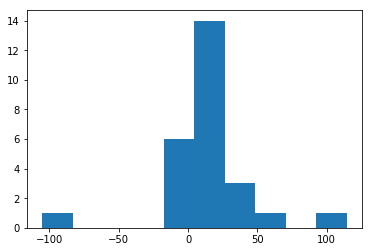

In [12]:
plt.hist(result[2:3])

In [14]:
pd.DataFrame(data=norm(result)).to_csv(path_to_experiment+case+".csv", header=None, index=None)